In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import Ridge,Lasso
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score , precision_score
from scipy.stats import skew
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data

Customer_data = pd.read_excel('G:/Data Science ML AI/Python files/Projects/Capstone_Mahinda_Finance_Use_Case/Data/Customer_Data.xlsx')

Final_invoice = pd.read_csv('G:/Data Science ML AI/Python files/Projects/Capstone_Mahinda_Finance_Use_Case/Data/Final_invoice.csv')

JTD = pd.read_csv('G:/Data Science ML AI/Python files/Projects/Capstone_Mahinda_Finance_Use_Case/Data/JTD.csv')

Plant_Master = pd.read_excel('G:/Data Science ML AI/Python files/Projects/Capstone_Mahinda_Finance_Use_Case/Data/Plant Master.xlsx')

In [3]:
# Reading the first 20 rows of customer data set
Customer_data.head(20)

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT
5,45,9,1.0,Z003,NaN,NaN,NaN,NaN,NaT
6,46,10,1.0,Z005,NaN,2.0,31.0,NaN,NaT
7,47,11,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8,49,13,9001.0,Z003,NaN,2.0,NaN,1981-05-18 00:00:00,NaT
9,50,14,1.0,Z005,NaN,NaN,NaN,NaN,NaT


In [4]:
# Reading the first 20 rows of Final_invoice data set
Final_invoice.head(20)

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2
5,5,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,84457,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200007,12:10:08,174053,2015-01-02,15:15:10,13122,0.00,TOYOTA,0.00,INNOVA,7.005200e+09,851.70,Running Repairs,0.0,14.22,400603,BC01,THANE,NaN,NO,0.0,MH04GM2960,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,865.92,0.0,0.0,0.0,0.0,865.92,BC01SA2
6,6,0.0,0.0,THANE WEST,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,12523,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200008,12:12:31,173953,2015-01-02,12:15:55,26964,0.00,HONDA,0.00,CITY,7.005200e+09,749.42,Running Repairs,0.0,0.00,400607,BC01,THANE,NaN,NO,0.0,MH06AL1935,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,749.42,0.0,0.0,0.0,0.0,749.42,BC01SA2
7,7,0.0,0.0,G.B. ROAD,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,55220,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200009,12:18:54,174254,2015-01-03,12:02:32,12943,0.00,MARUTI SUZUKI,0.00,SWIFT DZIRE,7.005200e+09,0.00,Running Repairs,0.0,0.00,400606,BC01,THANE,NaN,NO,0.0,MH04FR8641,0.0,0.0,0.0,0.0,NaN,0.0,SAMEER,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
8,8,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,84511,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200010,13:07:27,174162,2015-01-03,10:21:26,18563,0.00,TATA MOTORS,0.00,INDIGO,7.005200e+09,0.00,Running Repairs,0.0,0.00,400607,BC01,THANE,NaN,NO,0.0,MH05BJ558,0.0,0.0,0.0,0.0,NaN,0.0,HARSHAD,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA1
9,9,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,Na

In [5]:
# Reading the first 20 rows of JTD data set
JTD.head(20)

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63
5,5,23910,80,1DS030401EN129,NaN,CYLINDER LINER,P002,1.0,EA,1155.56
6,6,23910,90,1DM279001150156,NaN,824.72 SY.CYL.HEAD COVER-PLAS,P002,1.0,EA,1827.57
7,7,23910,100,OSLCC_SRV33,NaN,MACHINING CYLINDER HEAD (DIESEL),P010,1.0,MIN,3379.98
8,8,23910,110,OSLCC_SRV34,NaN,MACHINING CYLINDER BLOCK (DIESEL),P010,1.0,MIN,5880.97
9,9,23910,120,RECO001,NaN,MISC_RECOVERABLE CHARGES,P011,1.0,MIN,1099.99


In [6]:
# Reading the first 20 rows of Plant_master data set
Plant_Master.head(20)

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka
5,X005,X005 - KLN MOTORS,X005,PLX005,NaN,IN,Chennai,"No.8 (NP) Developed Plot,",600032.0,600032,Chennai,MFCB,Tamil Nadu
6,X006,X006 - A.M.MOTORS,X006,PLX006,NaN,IN,Mumbai,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra
7,X007,X007 - OM SRI SATYA SAI AUTOMO,X007,PLX007,NaN,IN,Bengaluru,"Seegehalli main road,",560037.0,560037,Bengaluru,MFCB,Karnataka
8,X008,X008- AAKASH AUTO (Puducherry),X008,PLX008,NaN,IN,Puducherry,"145/2, Villiyanur main road,",605110.0,605110,Puducherry,MFCC,Puducherry
9,X010,X010 - LVM MOTORS,X010,PLX010,NaN,IN,Chennai,"B- 49 Emerald Nagar, SIPCOT,",632406.0,632406,Ranipet,MFCD,Tamil Nadu


# Identifying missing values

In [7]:
def get_missingvalues(df):
    count = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([count,percent], axis=1, keys = ['count','percent'])
    return missing_values

In [8]:
get_missingvalues(Customer_data)

,count,percent
Death date,554675,99.880613
Date of Birth,541894,97.579132
Occupation,540780,97.378533
Marital Status,539301,97.112209
Title,46307,8.338525
Data Origin,136,0.024490
Partner Type,78,0.014046
Customer No.,0,0.000000
Business Partner,0,0.000000


In [9]:
get_missingvalues(Final_invoice)

,count,percent
Service Advisor Name,492314,100.000000
Claim No.,487510,99.024200
Policy no.,475432,96.570888
Expiry Date,470083,95.484386
Insurance Company,468723,95.208140
Cash /Cashless Type,464894,94.430384
Gate Pass Date,451399,91.689247
Technician Name,236834,48.106290
IGST(18%),197286,40.073205
IGST(12%),197286,40.073205


In [10]:
get_missingvalues(JTD)

,count,percent
Labor Value Number,3774033,67.159778
Target quantity UoM,51629,0.918750
Description,51629,0.918750
Material,51629,0.918750
Net value,0,0.000000
Order Quantity,0,0.000000
Item Category,0,0.000000
Order Item,0,0.000000
DBM Order,0,0.000000
Unnamed: 0,0,0.000000


In [11]:
get_missingvalues(Plant_Master)

,count,percent
Vendor number plant,436,99.543379
Sales organization,5,1.141553
House number and street,2,0.456621
Name 2,2,0.456621
PO Box,1,0.228311
State,0,0.000000
City,0,0.000000
Postal Code,0,0.000000
Factory calendar,0,0.000000
Customer no. - plant,0,0.000000


# Shape of datasets

In [12]:
print("Customer data shape is:",Customer_data.shape)
print("Final Invoice data shape is:",Final_invoice.shape)
print("JTD data shape is:",JTD.shape)
print("Plant_Master data shape is:",Plant_Master.shape)

Customer data shape is: (555338, 9)
Final Invoice data shape is: (492314, 59)
JTD data shape is: (5619484, 10)
Plant_Master data shape is: (438, 13)


# Data Preprocessing and EDA

In [13]:
# Droppiong records from customer data which has more than 50% missing values
Customer_data = Customer_data.drop(['Title','Marital Status','Occupation','Date of Birth','Death date'],axis=1)
Customer_data.head(10)

,Business Partner,Customer No.,Partner Type,Data Origin
0,31,1,1.0,Z001
1,32,2,1.0,Z005
2,34,4,1.0,Z005
3,35,5,1.0,Z005
4,42,7,1.0,Z008
5,45,9,1.0,Z003
6,46,10,1.0,Z005
7,47,11,NaN,NaN
8,49,13,9001.0,Z003
9,50,14,1.0,Z005


In [14]:
#Imputing Partner Type and Data Origin with mode value
Customer_data['Partner Type'] = Customer_data['Partner Type'].fillna(Customer_data['Partner Type'].mode()[0])
Customer_data['Data Origin'] = Customer_data['Data Origin'].fillna(Customer_data['Data Origin'].mode()[0])

print("Total missing Values in Partner Type:",Customer_data['Partner Type'].isnull().sum())
print("Total missing values in Data Origin:",Customer_data['Data Origin'].isnull().sum())

Total missing Values in Partner Type: 0
Total missing values in Data Origin: 0


In [15]:
#Dropping columns which has more than 45% of missing values and other irrelevant columns
Final_invoice = Final_invoice.drop(['Amt Rcvd From Custom','Amt Rcvd From Ins Co',
                                          'CGST(14%)','CGST(2.5%)', 'CGST(6%)','IGST(12%)','CGST(9%)',
                                          'IGST(18%)','IGST(28%)','IGST(5%)','SGST/UGST(14%)',
                                          'SGST/UGST(2.5%)','SGST/UGST(6%)','SGST/UGST(9%)',
                                          'TDS amount','Service Advisor Name','Outstanding Amt',
                                        'Total CGST','Total GST','Total IGST','Total SGST/UGST',
                                          'Policy no.','Cash /Cashless Type','Expiry Date','Gate Pass Date',
                                          'Insurance Company','Claim No.','Unnamed: 0'
                                         ],axis=1)
Final_invoice.head(5)

,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID
0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1
1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2
2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2
3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2
4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,2747.12,BC01SA2


In [16]:
#Merging Invoice date and Invoice time column and Job card date and Job card time column and creating new Service TAT column
Final_invoice["Invoice_Date_time"] = Final_invoice["Invoice Date"] + ' ' + Final_invoice["Invoice Time"]
Final_invoice["Job_Card_Date_time"] = Final_invoice["JobCard Date"] + ' ' + Final_invoice["JobCard Time"]
Final_invoice["Invoice_Date_time"] = pd.to_datetime(Final_invoice["Invoice_Date_time"])
Final_invoice["Job_Card_Date_time"] = pd.to_datetime(Final_invoice["Job_Card_Date_time"])
Final_invoice['Service TAT'] = Final_invoice["Invoice_Date_time"]-Final_invoice["Job_Card_Date_time"]
Final_invoice.head(10)

,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_Date_time,Job_Card_Date_time,Service TAT
0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53
1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14
2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13
3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12
4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35
5,THANE,THANE,Retail,84457,Maharashtra,00:00:00,2015-01-03,7005200007,12:10:08,174053,2015-01-02,15:15:10,13122,0.00,TOYOTA,0.00,INNOVA,7.005200e+09,851.70,Running Repairs,14.22,400603,BC01,THANE,NO,0.0,MH04GM2960,DAYANAND,865.92,865.92,BC01SA2,2015-01-03 12:10:08,2015-01-02 15:15:10,0 days 20:54:58
6,THANE WEST,THANE,Retail,12523,Maharashtra,00:00:00,2015-01-03,7005200008,12:12:31,173953,2015-01-02,12:15:55,26964,0.00,HONDA,0.00,CITY,7.005200e+09,749.42,Running Repairs,0.00,400607,BC01,THANE,NO,0.0,MH06AL1935,PRASHANT,749.42,749.42,BC01SA2,2015-01-03 12:12:31,2015-01-02 12:15:55,0 days 23:56:36
7,G.B. ROAD,THANE,Retail,55220,Maharashtra,00:00:00,2015-01-03,7005200009,12:18:54,174254,2015-01-03,12:02:32,12943,0.00,MARUTI SUZUKI,0.00,SWIFT DZIRE,7.005200e+09,0.00,Running Repairs,0.00,400606,BC01,THANE,NO,0.0,MH04FR8641,SAMEER,0.00,0.00,BC01SA2,2015-01-03 12:18:54,2015-01-03 12:02:32,0 days 00:16:22
8,THANE,THANE[W],Retail,84511,Maharashtra,00:00:00,2015-01-03,7005200010,13:07:27,174162,2015-01-03,10:21:26,18563,0.00,TATA MOTORS,0.00,INDIGO,7.005200e+09,0.00,Running Repairs,0.00,400607,BC01,THANE,NO,0.0,MH05BJ558,HARSHAD,0.00,0.00,BC01SA1,2015-01-03 13:07:27,2015-01-03 10:21:26,0 days 02:46:01
9,THANE,THANE,Retail,84457,Maharashtra,00:00:00,2015-01-03,7005200011,15:54:21,174203,2015-01-03,11:11:00,5443,698.92,MARUTI SUZUKI,49.99,ALTO,7.005200e+09,499.95,Paid Service,2663.75,400603,BC01,THANE,NO,0.0,GA07E3439,DAYANAND,3912.61,3912.61,BC01SA1,2015-01-03 15:54:21,2015-01-03 11:11:00,0 days 04:43:21


In [17]:
Final_invoice.drop(['JobCard Date','JobCard Time','Invoice Date','Invoice Time'],axis=1,inplace=True)
Final_invoice.head(5)

,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_Date_time,Job_Card_Date_time,Service TAT
0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53
1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14
2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13
3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12
4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35


In [18]:
#Dropping column which has more than 50% missing values in JTD dataset

JTD = JTD.drop(['Labor Value Number','Unnamed: 0'],axis=1)

#Imputing missing values in JTD dataset

JTD['Target quantity UoM'] = JTD['Target quantity UoM'].fillna(JTD['Target quantity UoM'].mode()[0])
JTD['Description'] = JTD['Description'].fillna(JTD['Description'].mode()[0])
JTD['Material'] = JTD['Material'].fillna(JTD['Material'].mode()[0])

JTD.head(10)


,DBM Order,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,23910,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,23910,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,23910,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,23910,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63
5,23910,80,1DS030401EN129,CYLINDER LINER,P002,1.0,EA,1155.56
6,23910,90,1DM279001150156,824.72 SY.CYL.HEAD COVER-PLAS,P002,1.0,EA,1827.57
7,23910,100,OSLCC_SRV33,MACHINING CYLINDER HEAD (DIESEL),P010,1.0,MIN,3379.98
8,23910,110,OSLCC_SRV34,MACHINING CYLINDER BLOCK (DIESEL),P010,1.0,MIN,5880.97
9,23910,120,RECO001,MISC_RECOVERABLE CHARGES,P011,1.0,MIN,1099.99


# Merging datasets

In [19]:
# Joining Customer_data and Final_invoice datasets
customer_invoice = pd.merge(Final_invoice,Customer_data, how = 'left', on = 'Customer No.')
customer_invoice.shape

(492314, 33)

In [20]:
customer_invoice.head(10)

,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_Date_time,Job_Card_Date_time,Service TAT,Business Partner,Partner Type,Data Origin
0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,NaN,NaN,NaN
1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,NaN,NaN,NaN
2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,NaN,NaN,NaN
3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,NaN,NaN,NaN
4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,NaN,NaN,NaN
5,THANE,THANE,Retail,84457,Maharashtra,00:00:00,7005200007,174053,13122,0.00,TOYOTA,0.00,INNOVA,7.005200e+09,851.70,Running Repairs,14.22,400603,BC01,THANE,NO,0.0,MH04GM2960,DAYANAND,865.92,865.92,BC01SA2,2015-01-03 12:10:08,2015-01-02 15:15:10,0 days 20:54:58,NaN,NaN,NaN
6,THANE WEST,THANE,Retail,12523,Maharashtra,00:00:00,7005200008,173953,26964,0.00,HONDA,0.00,CITY,7.005200e+09,749.42,Running Repairs,0.00,400607,BC01,THANE,NO,0.0,MH06AL1935,PRASHANT,749.42,749.42,BC01SA2,2015-01-03 12:12:31,2015-01-02 12:15:55,0 days 23:56:36,NaN,NaN,NaN
7,G.B. ROAD,THANE,Retail,55220,Maharashtra,00:00:00,7005200009,174254,12943,0.00,MARUTI SUZUKI,0.00,SWIFT DZIRE,7.005200e+09,0.00,Running Repairs,0.00,400606,BC01,THANE,NO,0.0,MH04FR8641,SAMEER,0.00,0.00,BC01SA2,2015-01-03 12:18:54,2015-01-03 12:02:32,0 days 00:16:22,NaN,NaN,NaN
8,THANE,THANE[W],Retail,84511,Maharashtra,00:00:00,7005200010,174162,18563,0.00,TATA MOTORS,0.00,INDIGO,7.005200e+09,0.00,Running Repairs,0.00,400607,BC01,THANE,NO,0.0,MH05BJ558,HARSHAD,0.00,0.00,BC01SA1,2015-01-03 13:07:27,2015-01-03 10:21:26,0 days 02:46:01,NaN,NaN,NaN
9,THANE,THANE,Retail,84457,Maharashtra,00:00:00,7005200011,174203,5443,698.92,MARUTI SUZUKI,49.99,ALTO,7.005200e+09,499.95,Paid Service,2663.75,400603,BC01,THANE,NO,0.0,GA07E3439,DAYANAND,3912.61,3912.61,BC01SA1,2015-01-03 15:54:21,2015-01-03 11:11:00,0 days 04:43:21,NaN,NaN,NaN


In [21]:
# Now we wil join customer_invoice with JTD dataset
JTD.head(10)

,DBM Order,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,23910,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,23910,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,23910,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,23910,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63
5,23910,80,1DS030401EN129,CYLINDER LINER,P002,1.0,EA,1155.56
6,23910,90,1DM279001150156,824.72 SY.CYL.HEAD COVER-PLAS,P002,1.0,EA,1827.57
7,23910,100,OSLCC_SRV33,MACHINING CYLINDER HEAD (DIESEL),P010,1.0,MIN,3379.98
8,23910,110,OSLCC_SRV34,MACHINING CYLINDER BLOCK (DIESEL),P010,1.0,MIN,5880.97
9,23910,120,RECO001,MISC_RECOVERABLE CHARGES,P011,1.0,MIN,1099.99


In [26]:
#We can see there are duplicate order no's and now we wil group them to show just a single order number and will aggregate the measures to sum

JTD_grouped = JTD.groupby(["DBM Order","Item Category"],as_index=False).agg({"Net value":'sum',"Order Quantity":'sum'})
JTD_grouped.head(10)

,DBM Order,Item Category,Net value,Order Quantity
0,4,P001,3455.92,714.0
1,4,P002,11042.62,15.6
2,4,P010,2399.95,1.0
3,4,P011,100.00,1.0
4,5,P001,2310.47,283.0
5,5,P002,1469.33,7.2
6,6,P001,1340.37,109.0
7,7,P001,167.36,36.5
8,8,P001,200.02,60.0
9,8,P002,2106.92,9.0


In [27]:
JTD_grouped.shape

(1735310, 4)

In [29]:
#we will now join customer_invoice with JTD data sets
customer_invoice_jtd = pd.merge(customer_invoice, JTD_grouped, how = 'left', left_on = 'Job Card No', right_on = 'DBM Order')
customer_invoice_jtd.head(10)

,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_Date_time,Job_Card_Date_time,Service TAT,Business Partner,Partner Type,Data Origin,DBM Order,Item Category,Net value,Order Quantity
0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,NaN,NaN,NaN,168303.0,P001,1203.14,73.0
1,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,NaN,NaN,NaN,168303.0,P002,2348.75,6.5
2,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,NaN,NaN,NaN,168303.0,P010,500.06,1.0
3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,NaN,NaN,NaN,173997.0,P001,804.26,170.0
4,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,NaN,NaN,NaN,173997.0,P011,197.03,1.0
5,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,NaN,NaN,NaN,173889.0,P001,180.19,30.0
6,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,NaN,NaN,NaN,173889.0,P002,52.95,3.0
7,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,NaN,NaN,NaN,174158.0,P001,0.00,86.0
8,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,NaN,NaN,NaN,174158.0,P011,0.00,1.0
9,THANE,THANE,Retail,18980,Maharashtra,00:00:00,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,NaN,NaN,NaN,173860.0,P001,1202.97,85.0


In [30]:
customer_invoice_jtd.isnull().sum()

Area / Locality        49527
CITY                       1
Cust Type                  0
Customer No.               0
District                   0
Gate Pass Time             0
Invoice No                 0
Job Card No                0
KMs Reading                0
Labour Total               0
Make                       0
Misc Total                 0
Model                   3185
ODN No.               337171
OSL Total                  0
Order Type                 0
Parts Total                0
Pin code                   0
Plant                      0
Plant Name1                0
Print Status               0
Recovrbl Exp               0
Regn No                   23
Technician Name       414979
Total Amt Wtd Tax.         0
Total Value           337171
User ID                    0
Invoice_Date_time          0
Job_Card_Date_time         0
Service TAT                0
Business Partner      894749
Partner Type          894749
Data Origin           894749
DBM Order                 39
Item Category 

In [31]:
Plant_Master = pd.read_excel('G:/Data Science ML AI/Python files/Projects/Capstone_Mahinda_Finance_Use_Case/Data/Plant Master.xlsx')
Plant_Master.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [32]:
plants_per_state = pd.crosstab(index = Plant_Master["State"], columns = "Plant")
plants_per_state

col_0,Plant
State,
Andhra Pradesh,15
Assam,7
Bihar,21
Chandigarh,1
Chhattisgarh,5
Delhi,1
Goa,1
Gujarat,13
Haryana,20


In [33]:
import seaborn as sns

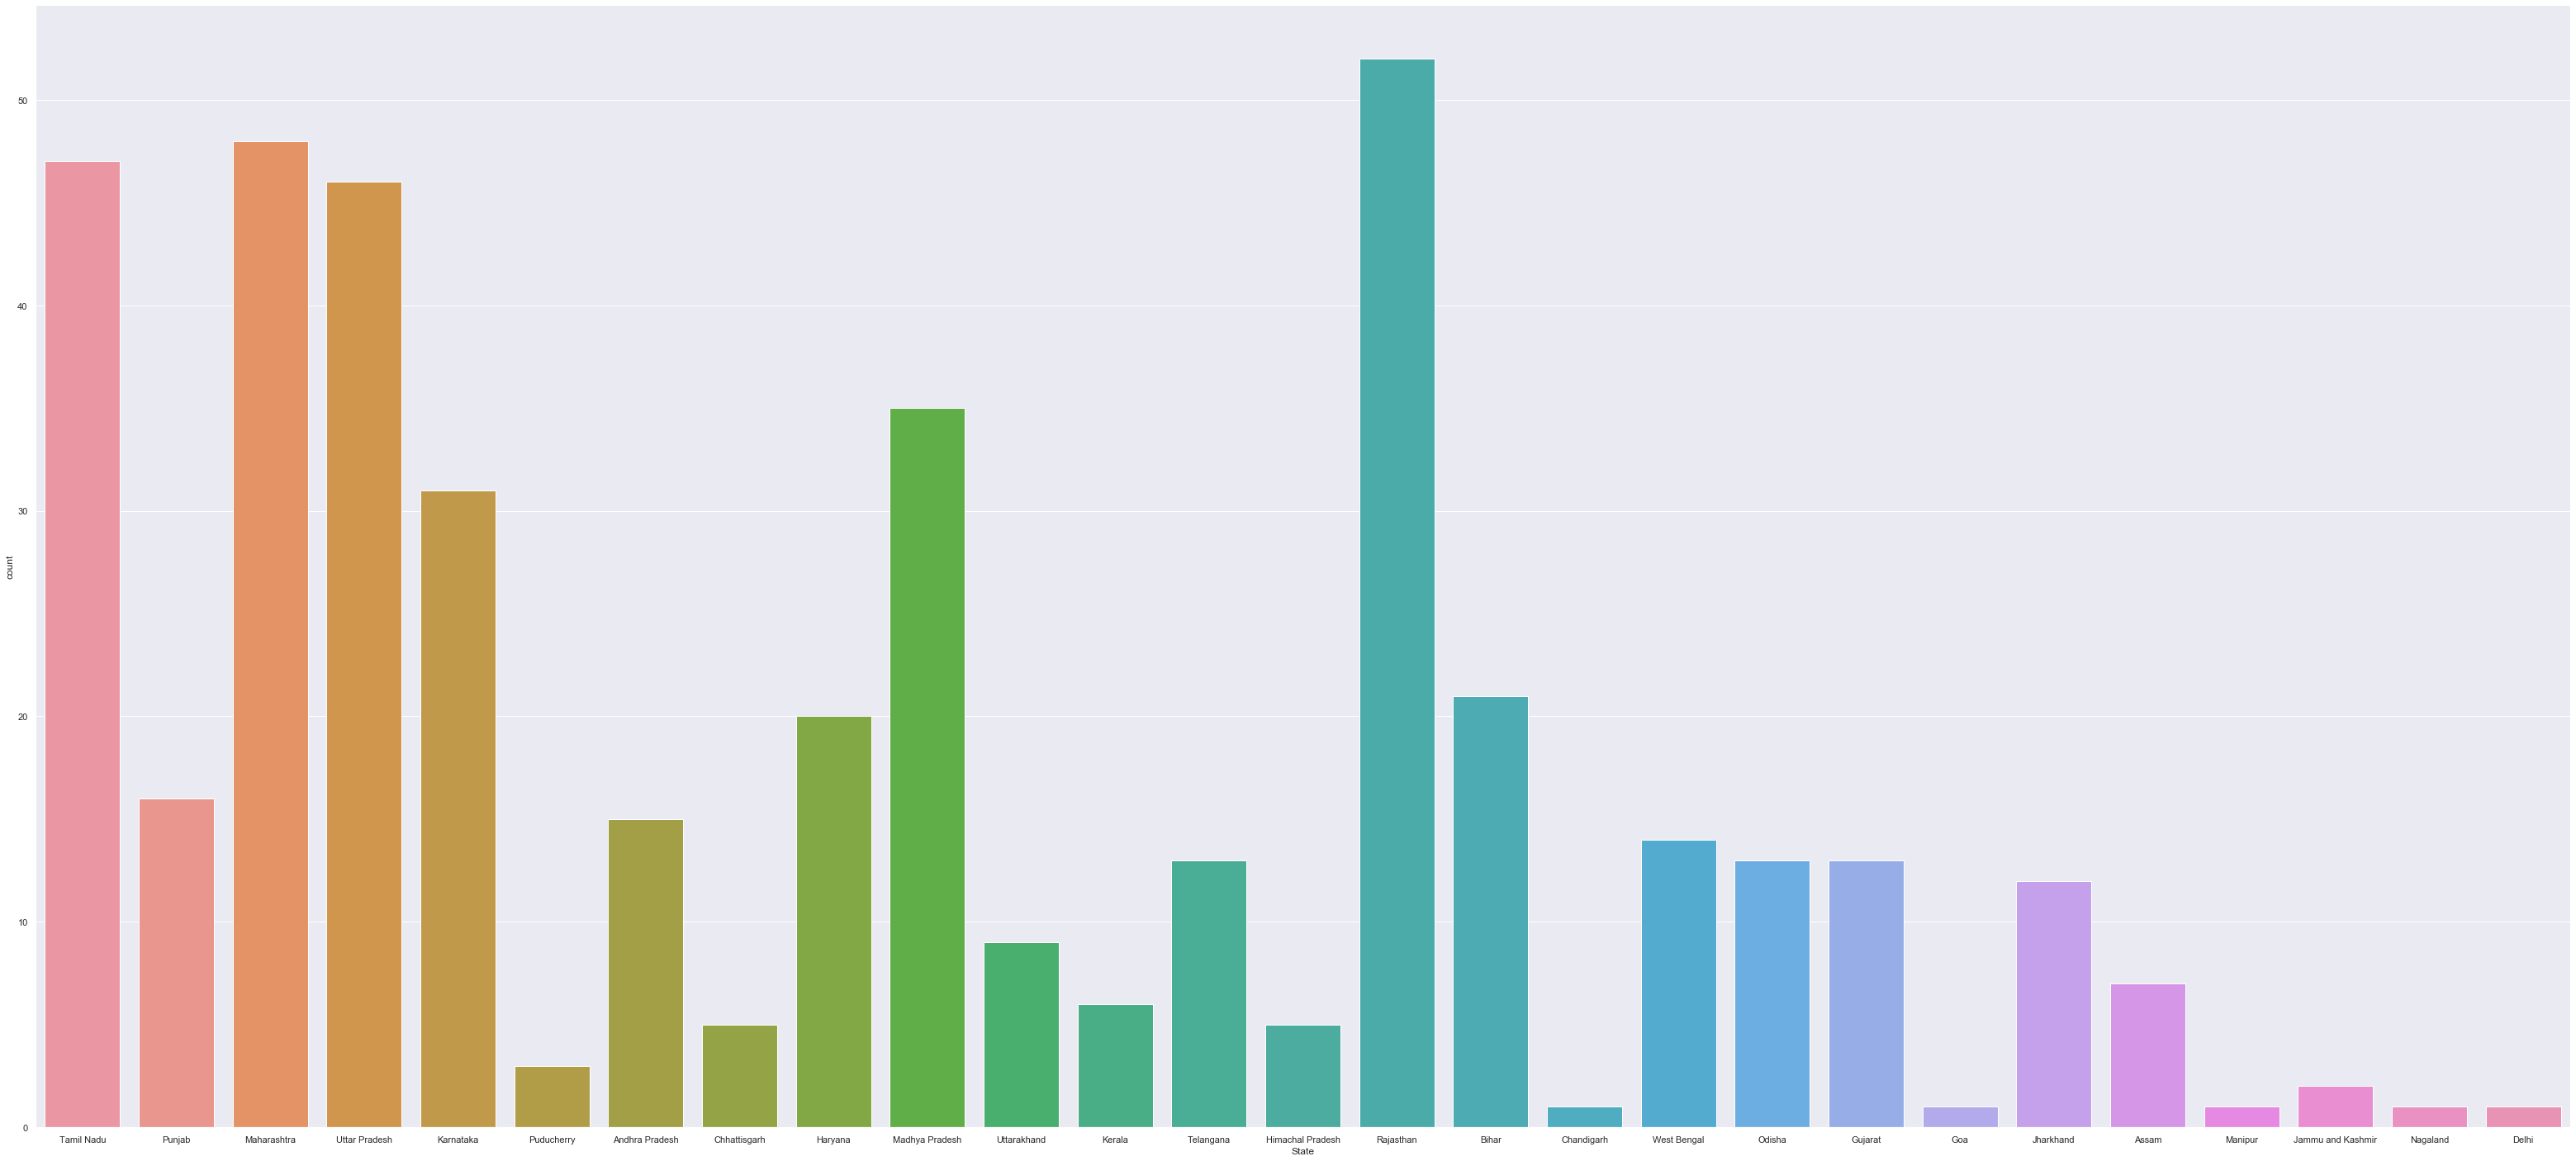

In [37]:
plt.figure(figsize=(55,25))
sns.set(style='darkgrid')
ax = sns.countplot(x="State",data=Plant_Master)